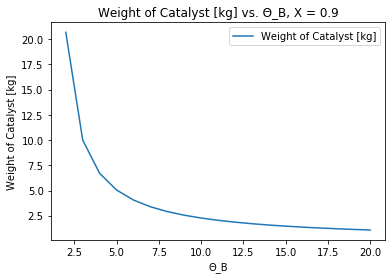

In [1]:
# Homework 3 
# Problem 1c
# Due 25 October 2019

import numpy as np;
import matplotlib.pyplot as plt;

k = 0.010;
Cao = 0.1 * 1000;
nu = 9.0;
P_in = 1013;
beta = 22.6;
rho = 2500;
void = 0.45;
A = 1.3*10**-3;


# calculating alpha...
alpha = 2*beta / (A*(1-void)*rho*P_in);

gamma = k*Cao / nu; # gamma represents k*Cao / nu - see Markup cell underneath

def X_integral (X, thetaB):
  integral_out = (thetaB - 1)**-1 * np.log( (thetaB - X)/(thetaB*(1-X)) )
  return integral_out;

# define a new array of thetaB values
thetaB = np.linspace(2, 20, 19)

# make empty arrays for weight, will run for loop and add below
W = [];

# for loop to compute W for each thetaB from 2 to 20, appends to empty W array
# using the solution to the integral from the Midterm 1 Equation Sheet
for j in range(2, 21):
  x_integral_result = X_integral(0.9, j);
  a = gamma*alpha / 2;
  b = -gamma;
  c = x_integral_result;
  
  coeff = [a, b, c]; # coefficients for the 2nd order polynomial to solve for W
  roots = np.roots(coeff); # numpy polynomial solver
  W.append(roots[1]); # append to empty array

# plotting...
plt.plot(thetaB, W, label="Weight of Catalyst [kg]")
plt.title("Weight of Catalyst [kg] vs. Θ_B, X = 0.9")
plt.ylabel("Weight of Catalyst [kg]")
plt.xlabel("Θ_B")
plt.legend()

Note: to clarify, the gamma for the (1a) code is defined as below.

![alt text](https://i.imgur.com/KaMuQ9a.png)

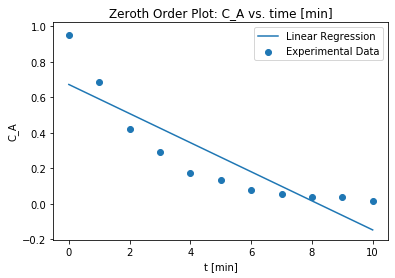

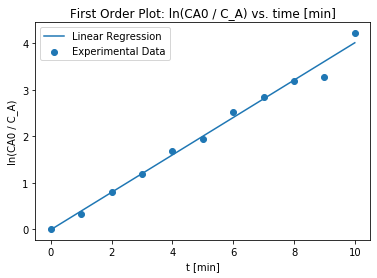

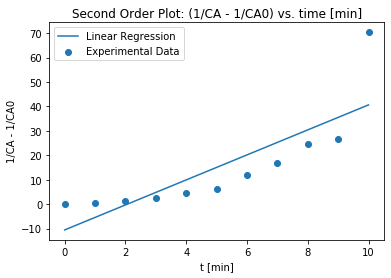

In [131]:
# Problem 2a 

import numpy as np;
import matplotlib.pyplot as plt;
from scipy import stats;

# experimental data
t = np.linspace(0,10,11) # [=] min
CA = [0.953, 0.686, 0.424, 0.290, 0.176, 0.136, 0.077, 0.056, 0.039, 0.036, 0.014] # [=] mol/L
CA0 = CA[0];

# part a: using the integral method

# zeroth order
plt.figure()
slope, intercept, rval, pval, std_err = stats.linregress(t, CA);
plt.scatter(t, CA, label="Experimental Data");
plt.plot(t, (slope*t + intercept), label="Linear Regression");
plt.title("Zeroth Order Plot: C_A vs. time [min]");
plt.ylabel("C_A");
plt.xlabel("t [min]");
plt.legend();

# first order
plt.figure()
slope, intercept, rval, pval, std_err = stats.linregress(t, (np.log(CA0) - np.log(CA)));
plt.scatter(t, (np.log(CA0) - np.log(CA)), label="Experimental Data");
plt.plot(t, (slope*t + intercept), label="Linear Regression");
plt.title("First Order Plot: ln(CA0 / C_A) vs. time [min]");
plt.ylabel("ln(CA0 / C_A)");
plt.xlabel("t [min]");
plt.legend();

# second order
plt.figure()
numpy_CA = np.array(CA); # converted 
data = (1 / numpy_CA) - (1 / CA0);
slope, intercept, rval, pval, std_err = stats.linregress(t, data);
plt.scatter(t, data, label="Experimental Data");
plt.plot(t, (slope*t + intercept), label="Linear Regression");
plt.title("Second Order Plot: (1/CA - 1/CA0) vs. time [min]");
plt.ylabel("1/CA - 1/CA0");
plt.xlabel("t [min]");
plt.legend();

2a) From the plots, based on how well the data aligns with the respective regressions, the reaction is **first order**.



In [90]:
# Problem 2b 

# determining the reaction rate constant based on the first order fit
slope, intercept, rval, pval, std_err = stats.linregress(t, (np.log(CA0) - np.log(CA)));

# ln(CA0 / CA) = kt is equivalent to y = mx where y = ln(CA0 / CA), x = t, m = k
# thus k is slope
k = slope;
print("2b) Rate Constant: ", k, "[=] 1/min")


2b) Rate Constant:  0.4015134099295997 [=] 1/min


Order of the reaction is:  2.182794677207815 rounded -----> Second Order
Reaction rate constant:  0.10150065413078285 [=] L / (mol min)


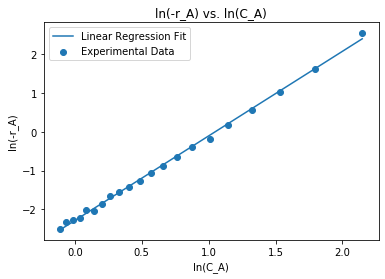

In [129]:
# Problem 3 (a-c)

# (3a) - calculate reaction order
CA = np.loadtxt("concentration_data.txt"); 
t = np.loadtxt("time_data.txt");

dca = np.diff(CA);
dt = np.diff(t);

y = np.log(-dca / dt);
slope, intercept, rval, pval, std_err = stats.linregress(np.log(CA[1:len(CA)]), y);

# alpha is slope
alpha = slope;
print("Order of the reaction is: ", slope, "rounded -----> Second Order" )

# (3b) - calculate reaction rate constant
print("Reaction rate constant: ", np.exp(intercept), "[=] L / (mol min)")

# (3c) - plot

x = np.log(CA[1:len(CA)]);
fit = alpha*x + intercept;
plt.scatter(x, y, label="Experimental Data");
plt.plot(x, fit, label="Linear Regression Fit");
plt.title("ln(-r_A) vs. ln(C_A)");
plt.ylabel("ln(-r_A)");
plt.xlabel("ln(C_A)");
plt.legend();

